<a href="https://colab.research.google.com/github/GeoLabUniLaSalle/Python/blob/main/python_regression_practice_corrige%CC%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TD Régression pytorch 1 

A partir du cours proposez une éxpérimentation du premier modèle définis avec la nouvelle fonction donnée. 
Vous pouvez utiliser la méthode de conception de modèle que vous souhaitez (classe ou séquentiel)

Imporation des bibliothèques 

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio

In [ ]:
# Notre nouvelle target est basée sur une fonction sin sur laquelle du bruit à été ajouté 
x = torch.unsqueeze(torch.linspace(-10, 10, 1000), dim=1)  
y = torch.sin(x) + 0.2*torch.rand(x.size())                 


Défintion du modèle Net

In [ ]:
# Conversion en variable
x, y = Variable(x), Variable(y)

# 
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      
        x = self.predict(x)             
        return x
    
net = Net(n_feature=1, n_hidden=10, n_output=1)     
print(net)  
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)
loss_func = torch.nn.MSELoss()  

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


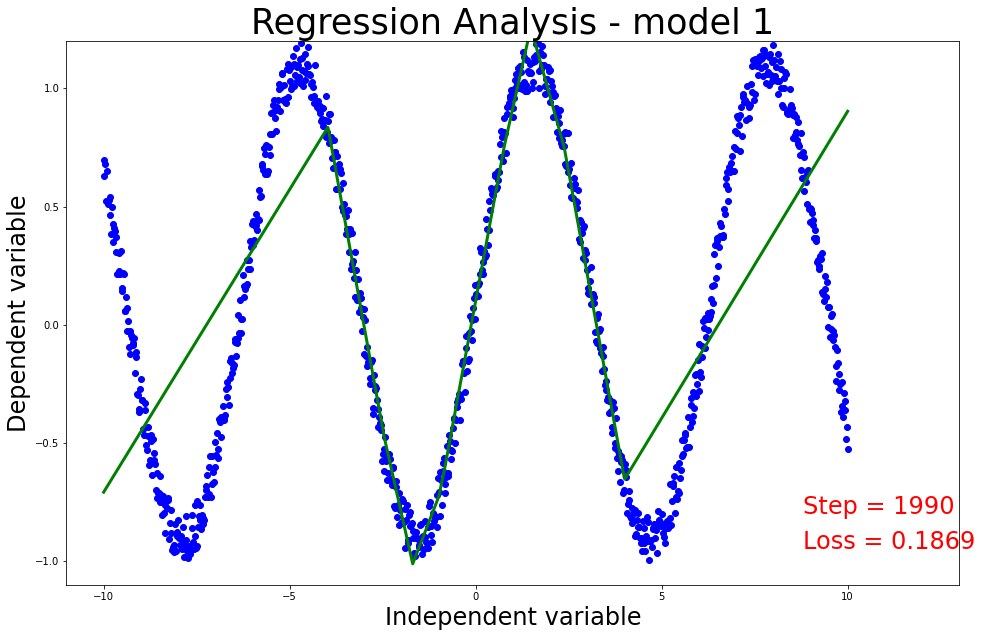

In [ ]:
my_images = []
fig, ax = plt.subplots(figsize=(16,10))
# start training
for t in range(2000):
  
    prediction = net(x)     

    loss = loss_func(prediction, y)     

    optimizer.zero_grad()   
    loss.backward()         
    optimizer.step()        
    
    if t % 10 == 0:
        
        plt.cla()
        ax.set_title('Regression Analysis - model 1', fontsize=35)
        ax.set_xlabel('Independent variable', fontsize=24)
        ax.set_ylabel('Dependent variable', fontsize=24)
        ax.set_xlim(-11.0, 13.0)
        ax.set_ylim(-1.1, 1.2)
        ax.scatter(x.data.numpy(), y.data.numpy(), color = "blue")
        ax.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
        ax.text(8.8, -0.8, 'Step = %d' % t, fontdict={'size': 24, 'color':  'red'})
        ax.text(8.8, -0.95, 'Loss = %.4f' % loss.data.numpy(),
                fontdict={'size': 24, 'color':  'red'})

        fig.canvas.draw()      
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

        my_images.append(image)

In [ ]:
imageio.mimsave('./curve_2_model_1.gif', my_images, fps=10)